In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)

site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)

site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)

site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)


all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

# Australia

In [8]:
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_au_group.Date_reported =  pd.to_datetime(site_au_group.Date_reported)
site_au_group.Date_reported

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [10]:
site_au_group.set_index('Date_reported', inplace=True)

In [11]:
print(site_au_group.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2020-01-03 to 2020-09-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   NC_au_24h  269 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB
None


In [12]:
date_time =  site_au_group.index
date_time

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27'],
              dtype='datetime64[ns]', name='Date_reported', length=269, freq=None)

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg

In [14]:
selected_features = ['NC_au_24h']

features = site_au_group[selected_features]
features.index = date_time
features.head()

,NC_au_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


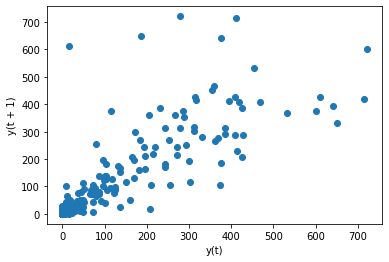

In [15]:
%matplotlib inline

lag_plot(features['NC_au_24h'])
plt.show()

In [16]:
ad_fuller_result = adfuller(features['NC_au_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.428729688953197
p-value: 0.1337912881358546


<font size="2">We have a large negative ADF statistic and P value bigger than 0.05, thus we can reject the null hypothesis and say our time series is stationary. Next step should be look at PACF</font>

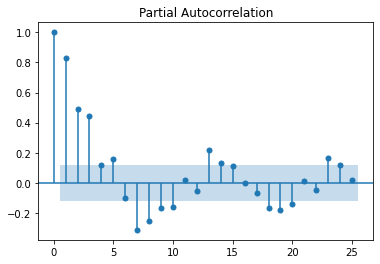

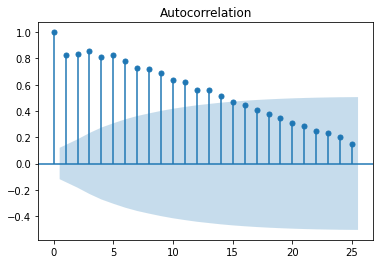

In [17]:
plot_pacf(features['NC_au_24h']);
plot_acf(features['NC_au_24h']);

In [18]:
rho, sigma = yule_walker(features['NC_au_24h'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.135328   -0.19469574 -0.38086038 -0.09752673 -0.15637805]
sigma: 63.70940101547993


<font size="2">
Thus our final equation is y(t) = 65.503 -0.15y(t-1) -0.25y(t-2) - 0.42y(t-3) -0.12y(t-4)</font>

In [19]:
result_data_only = features['NC_au_24h']

In [20]:
result_data_only

Date_reported
2020-01-03     0
2020-01-04     0
2020-01-05     0
2020-01-06     0
2020-01-07     0
              ..
2020-09-23    30
2020-09-24    31
2020-09-25    10
2020-09-26    17
2020-09-27    16
Name: NC_au_24h, Length: 269, dtype: int64

In [21]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [22]:

res = AutoReg(result_data_only, lags = 5).fit()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.421, HQIC: 8.459, BIC: 8.516


In [24]:
res = AutoReg(result_data_only, lags=5, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.427, HQIC: 8.487, BIC: 8.576


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [25]:
train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept       4.377873
NC_au_24h.L1    0.162048
NC_au_24h.L2    0.205831
NC_au_24h.L3    0.372548
NC_au_24h.L4    0.080241
NC_au_24h.L5    0.139343
dtype: float64


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [26]:

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=33.900223, expected=30.000000
predicted=8.442993, expected=31.000000
predicted=33.168187, expected=10.000000
predicted=36.904214, expected=17.000000
predicted=27.115401, expected=16.000000
Test RMSE: 17.779


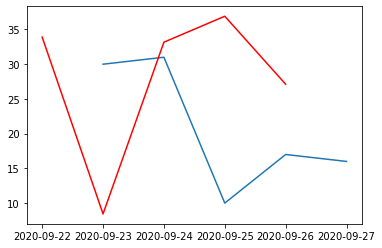

In [27]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Coefficients: intercept       5.440231
NC_au_24h.L1    0.158701
NC_au_24h.L2    0.203830
NC_au_24h.L3    0.372006
NC_au_24h.L4    0.082358
NC_au_24h.L5    0.141187
dtype: float64
predicted=96.502273, expected=43.000000
predicted=69.054983, expected=52.000000
predicted=84.272704, expected=91.000000
predicted=77.310817, expected=48.000000
predicted=61.015920, expected=52.000000
predicted=60.055704, expected=42.000000
predicted=49.530414, expected=44.000000
predicted=62.816542, expected=41.000000
predicted=66.672943, expected=46.000000
predicted=46.601863, expected=41.000000
predicted=43.305218, expected=34.000000
predicted=27.223912, expected=48.000000
predicted=53.429755, expected=24.000000
predicted=55.524521, expected=13.000000
predicted=40.536123, expected=14.000000
predicted=33.900223, expected=30.000000
predicted=8.442993, expected=31.000000
predicted=33.168187, expected=10.000000
predicted=36.904214, expected=17.000000
predicted=27.115401, expected=16.000000
Test RMSE: 23.353


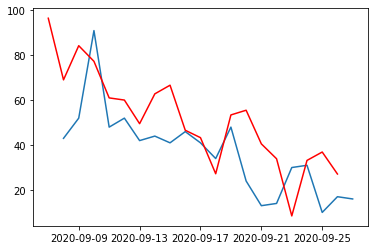

In [28]:
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [29]:
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

Test RMSE: 81.226


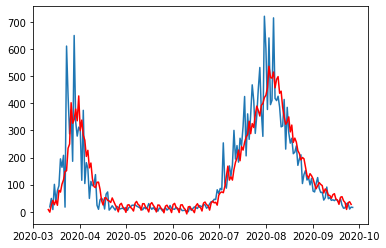

In [30]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [31]:
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

Test RMSE: 72.547


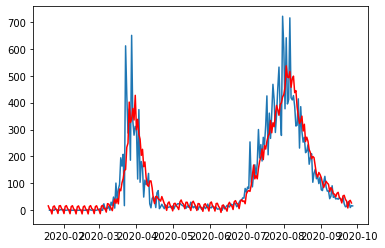

In [32]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

<font size="2">In this case, we could conclude the performance in autoregression is very successful in not only catching up the trends, but also close to the reality number in quantitative measurement.<br><br>
The disadvantage of Autoregression model is that it is a equation model, thus it require up-to-date input to generate tomorrow's prediction, and is harder to extend to longer future compare to LSTM</font>

# Italy

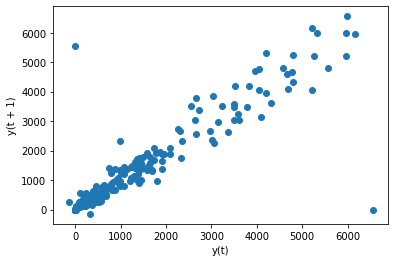

ADF Statistic: -2.37740166983437
p-value: 0.1482164593925191


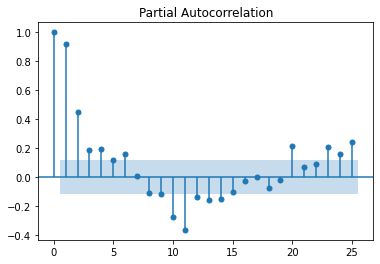

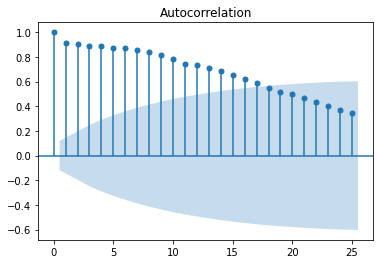

In [33]:
site_it_group.Date_reported =  pd.to_datetime(site_it_group.Date_reported)
site_it_group.set_index('Date_reported', inplace=True)
date_time =  site_it_group.index

selected_features = ['NC_it_24h']

features = site_it_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_it_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_it_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_it_24h']);
plot_acf(features['NC_it_24h']);

rho: [-0.36776416 -0.27202805 -0.07088522 -0.14767463 -0.11574412]
sigma: 502.20127520661987
AIC: 12.558, HQIC: 12.596, BIC: 12.653
AIC: 12.559, HQIC: 12.619, BIC: 12.708
Coefficients: intercept       49.146238
NC_it_24h.L1     0.391383
NC_it_24h.L2     0.275163
NC_it_24h.L3     0.068509
NC_it_24h.L4     0.138153
NC_it_24h.L5     0.095526
dtype: float64
predicted=1635.083697, expected=1391.000000
predicted=1381.602929, expected=1640.000000
predicted=1564.295821, expected=1786.000000
predicted=1611.176912, expected=1912.000000
predicted=1614.255800, expected=1869.000000
Test RMSE: 257.250


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


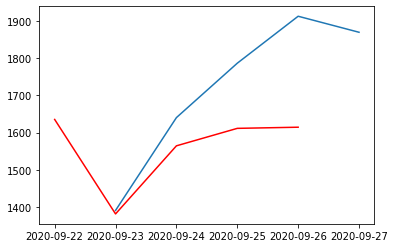

In [34]:
# Training sample 5
rho, sigma = yule_walker(features['NC_it_24h'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_it_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 5).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=5, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       46.673462
NC_it_24h.L1     0.376072
NC_it_24h.L2     0.260272
NC_it_24h.L3     0.064527
NC_it_24h.L4     0.101303
NC_it_24h.L5     0.043242
NC_it_24h.L6     0.126795
dtype: float64
predicted=1598.565134, expected=1150.000000
predicted=1302.966640, expected=1369.000000
predicted=1438.066309, expected=1700.000000
predicted=1452.999037, expected=1327.000000
predicted=1486.627223, expected=1616.000000
predicted=1435.226076, expected=1501.000000
predicted=1311.800661, expected=1456.000000
predicted=1637.117156, expected=1008.000000
predicted=1551.661269, expected=1229.000000
predicted=1277.195518, expected=1452.000000
predicted=1282.867012, expected=1583.000000
predicted=1207.145215, expected=1907.000000
predicted=1521.424819, expected=1637.000000
predicted=1683.498284, expected=1587.000000
predicted=1632.063908, expected=1350.000000
predicted=1635.083697, expected=1391.000000
predicted=1381.602929, expected=1640.000000
predicted=1564.295821, expected=1786.0000

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


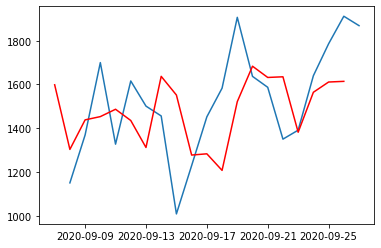

In [35]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=6)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Test RMSE: 634.041


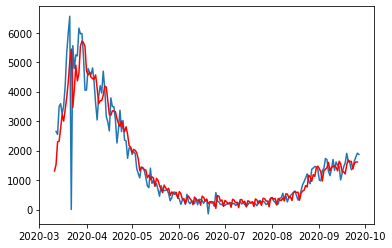

In [36]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 576.786


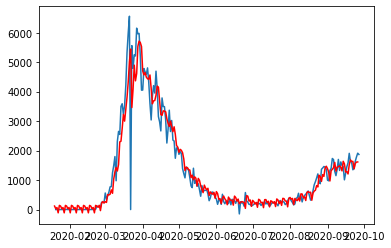

In [37]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()


# China

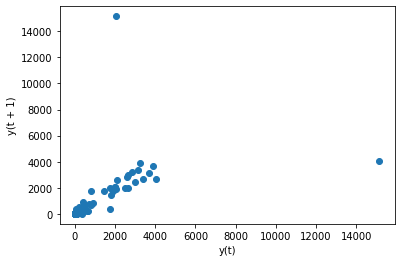

ADF Statistic: -2.9295593549240633
p-value: 0.04201704642193712


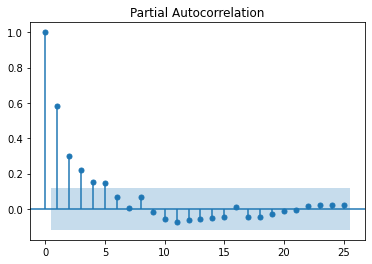

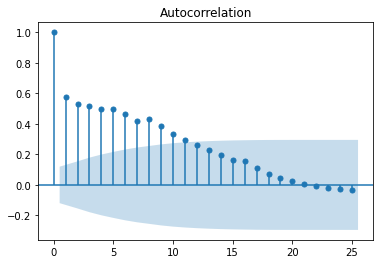

In [38]:
site_cn_group.Date_reported =  pd.to_datetime(site_cn_group.Date_reported)
site_cn_group.set_index('Date_reported', inplace=True)
date_time =  site_cn_group.index

selected_features = ['NC_cn_24h']

features = site_cn_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_cn_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_cn_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_cn_24h']);
plot_acf(features['NC_cn_24h']);

rho: [-0.28406582 -0.15530223 -0.14379649 -0.10525417 -0.1454595 ]
sigma: 858.796924443184
AIC: 13.592, HQIC: 13.630, BIC: 13.687
AIC: 13.609, HQIC: 13.669, BIC: 13.758
Coefficients: intercept       60.457661
NC_cn_24h.L1     0.288600
NC_cn_24h.L2     0.155957
NC_cn_24h.L3     0.141876
NC_cn_24h.L4     0.102143
NC_cn_24h.L5     0.140352
dtype: float64
predicted=35.593297, expected=18.000000
predicted=17.637017, expected=10.000000
predicted=40.220014, expected=15.000000
predicted=274.011821, expected=18.000000
predicted=18.371708, expected=15.000000
Test RMSE: 115.375


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


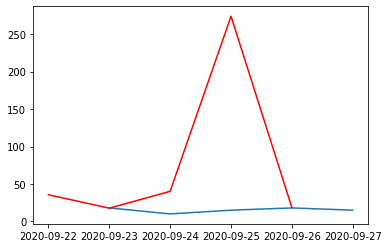

In [39]:
# Training sample 5
rho, sigma = yule_walker(features['NC_cn_24h'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_cn_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 5).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=5, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Coefficients: intercept       64.469194
NC_cn_24h.L1     0.288312
NC_cn_24h.L2     0.155712
NC_cn_24h.L3     0.141628
NC_cn_24h.L4     0.101903
NC_cn_24h.L5     0.140056
dtype: float64
predicted=30.092543, expected=22.000000
predicted=18.969904, expected=9.000000
predicted=43.816255, expected=13.000000
predicted=275.122115, expected=28.000000
predicted=18.161410, expected=20.000000
predicted=29.591442, expected=23.000000
predicted=12.600494, expected=29.000000
predicted=39.106229, expected=23.000000
predicted=278.766442, expected=16.000000
predicted=24.104838, expected=19.000000
predicted=28.945865, expected=44.000000
predicted=14.064095, expected=17.000000
predicted=46.900433, expected=26.000000
predicted=278.483185, expected=36.000000
predicted=24.506212, expected=14.000000
predicted=35.593297, expected=18.000000
predicted=17.637017, expected=10.000000
predicted=40.220014, expected=15.000000
predicted=274.011821, expected=18.000000
predicted=18.371708, expected=15.000000
Test RMSE: 1

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


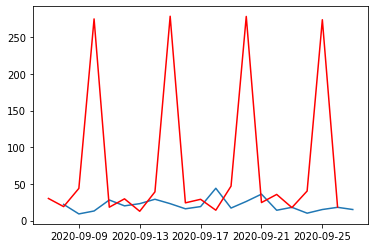

In [40]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 117.548


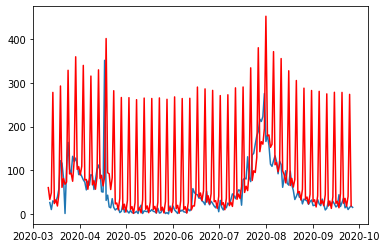

In [41]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 932.263


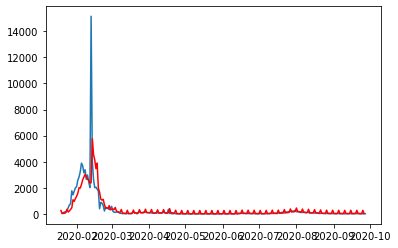

In [42]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

# US

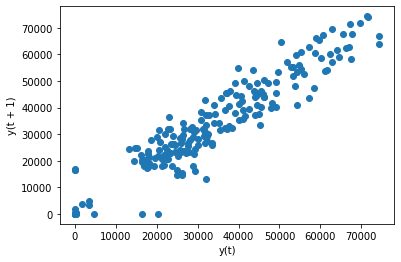

ADF Statistic: -1.4837014667773536
p-value: 0.541558032511702


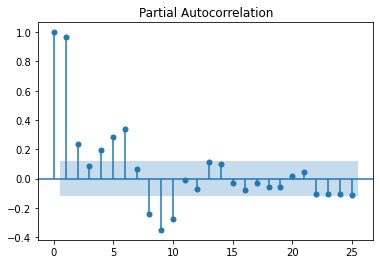

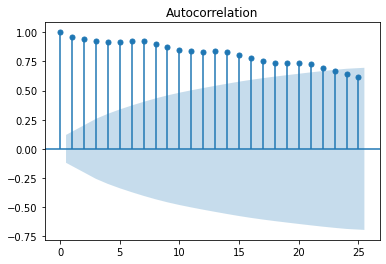

In [43]:
site_us_group.Date_reported =  pd.to_datetime(site_us_group.Date_reported)
site_us_group.set_index('Date_reported', inplace=True)
date_time =  site_us_group.index

selected_features = ['NC_us_24h']

features = site_us_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_us_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_us_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_us_24h']);
plot_acf(features['NC_us_24h']);

rho: [-0.64959088 -0.15227306  0.09290768  0.00620699 -0.2832109 ]
sigma: 5043.096182508184
AIC: 17.067, HQIC: 17.105, BIC: 17.162
AIC: 17.096, HQIC: 17.156, BIC: 17.245
Coefficients: intercept       779.470899
NC_us_24h.L1      0.655325
NC_us_24h.L2      0.167934
NC_us_24h.L3     -0.158651
NC_us_24h.L4      0.015335
NC_us_24h.L5      0.302586
dtype: float64
predicted=40650.027963, expected=39145.000000
predicted=37614.141101, expected=49176.000000
predicted=40115.154602, expected=40043.000000
predicted=48550.841252, expected=41254.000000
predicted=41841.666125, expected=50070.000000
Test RMSE: 7167.932


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


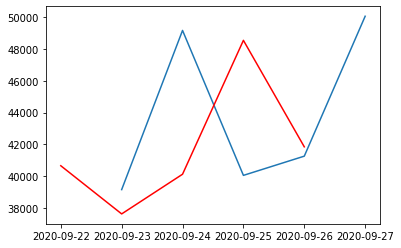

In [44]:
# Training sample 5
rho, sigma = yule_walker(features['NC_us_24h'], 5)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_us_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 5).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=5, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       761.619961
NC_us_24h.L1      0.610847
NC_us_24h.L2      0.188154
NC_us_24h.L3     -0.109821
NC_us_24h.L4      0.019322
NC_us_24h.L5      0.276927
dtype: float64

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)



predicted=44694.014889, expected=33486.000000
predicted=45232.227054, expected=26015.000000
predicted=35853.547833, expected=23204.000000
predicted=30733.137978, expected=31988.000000
predicted=30375.881705, expected=37128.000000
predicted=35595.190877, expected=45523.000000
predicted=37006.612565, expected=40126.000000
predicted=40228.749279, expected=35177.000000
predicted=36295.641996, expected=34111.000000
predicted=33765.986809, expected=34078.000000
predicted=35005.340201, expected=40795.000000
predicted=37609.499660, expected=42618.000000
predicted=40706.766829, expected=48266.000000
predicted=41004.433625, expected=41695.000000
predicted=43746.174781, expected=36766.000000
predicted=40650.027963, expected=39145.000000
predicted=37614.141101, expected=49176.000000
predicted=40115.154602, expected=40043.000000
predicted=48550.841252, expected=41254.000000
predicted=41841.666125, expected=50070.000000
Test RMSE: 7945.513


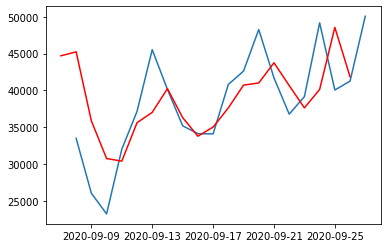

In [45]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 6555.696


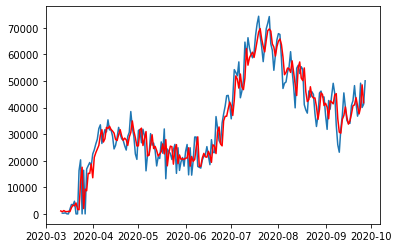

In [46]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 5851.499


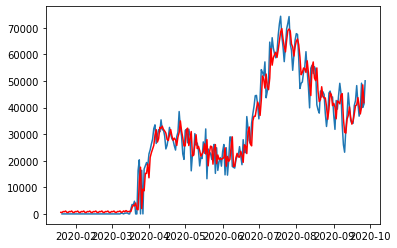

In [47]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()
